In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

# Load the dataset
from google.colab import files
import pandas as pd
# Upload the file
uploaded = files.upload()
# Assuming 'kerala.csv' is the name of the uploaded file
df = pd.read_csv('kerala.csv')

# Display the first few rows of the dataset
#df.head()


# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
print(df.describe())

# Display the column names
print(df.columns)


Saving kerala.csv to kerala.csv
  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO  
              YEAR         JAN         FEB         MAR         APR  \
count   118.000000  118.000000  118.000000  118.000000  118.000000   
mean   1959.50000

In [ ]:
# Display the column names to see what is available in your dataset
print(df.columns)


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')


In [ ]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Display the cleaned column names
print(df.columns)


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')


In [ ]:
# Select the relevant features for prediction
X = df[['YEAR', 'ANNUAL RAINFALL']]  # Modify as needed
y = df['FLOODS']  # Assuming this is the target variable


In [ ]:
# Display the selected features
print(X.head())
print(y.head())

   YEAR  ANNUAL RAINFALL
0  1901           3248.6
1  1902           3326.6
2  1903           3271.2
3  1904           3129.7
4  1905           2741.6
0    YES
1    YES
2    YES
3    YES
4     NO
Name: FLOODS, dtype: object


In [ ]:
# Encode the 'FLOODS' column
df['FLOODS'] = df['FLOODS'].map({'NO': 0, 'YES': 1})

# Check if the encoding is correct
print(df['FLOODS'].head())


0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the relevant features
X = df[['YEAR', 'ANNUAL RAINFALL']]
y = df['FLOODS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.08674917110080564
R-squared: 0.6430891246138283


In [ ]:
# Example future data (replace with actual or estimated rainfall values)
future_years = pd.DataFrame({
    'YEAR': [2019, 2020, 2021, 2022, 2023, 2024],
    'ANNUAL RAINFALL': [3000, 3200, 3100, 3300, 3400, 3500]  # Example values
})

# Scale the future data
future_years_scaled = scaler.transform(future_years[['YEAR', 'ANNUAL RAINFALL']])

# Predict the flood occurrences
future_predictions = model.predict(future_years_scaled)

# Add predictions to the DataFrame
future_years['Predicted_Flood_Occurrences'] = future_predictions

# Display the predictions
print(future_years)


   YEAR  ANNUAL RAINFALL  Predicted_Flood_Occurrences
0  2019             3000                     0.482277
1  2020             3200                     0.643840
2  2021             3100                     0.561344
3  2022             3300                     0.722906
4  2023             3400                     0.803116
5  2024             3500                     0.883326


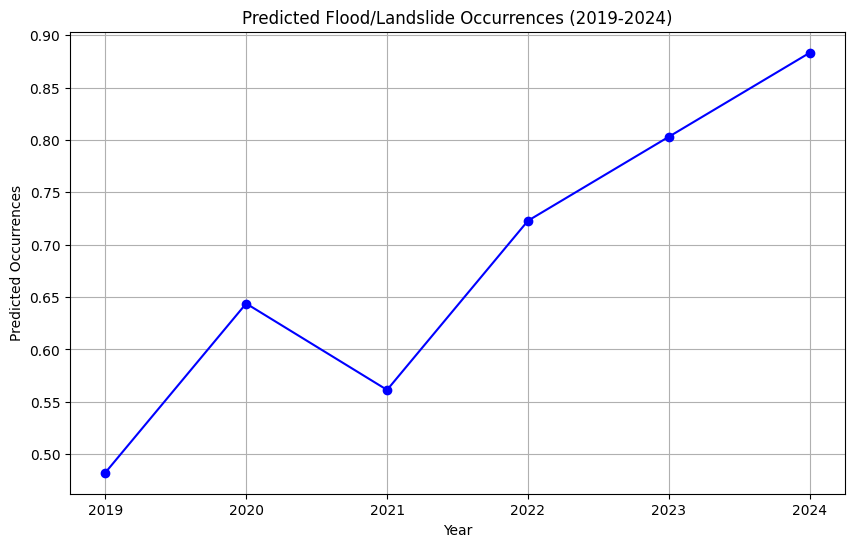

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(future_years['YEAR'], future_years['Predicted_Flood_Occurrences'], marker='o', linestyle='-', color='b')
plt.title('Predicted Flood/Landslide Occurrences (2019-2024)')
plt.xlabel('Year')
plt.ylabel('Predicted Occurrences')
plt.grid(True)
plt.show()


In [ ]:
# Save the predictions to a CSV file
future_years.to_csv('/content/wayanad_flood_landslide_predictions_2019_2024.csv', index=False)


In [ ]:
# Example future data for 2025-2030 (replace with actual or estimated rainfall values)
future_years_2025_2030 = pd.DataFrame({
    'YEAR': [2025, 2026, 2027, 2028, 2029, 2030],
    'ANNUAL RAINFALL': [3600, 3700, 3650, 3750, 3800, 3900]  # Example values
})


In [ ]:
# Scale the future data for 2025-2030
future_years_2025_2030_scaled = scaler.transform(future_years_2025_2030[['YEAR', 'ANNUAL RAINFALL']])


In [ ]:
# Predict the flood occurrences for 2025-2030
future_predictions_2025_2030 = model.predict(future_years_2025_2030_scaled)

# Add predictions to the DataFrame
future_years_2025_2030['Predicted_Flood_Occurrences'] = future_predictions_2025_2030

# Display the predictions
print(future_years_2025_2030)


   YEAR  ANNUAL RAINFALL  Predicted_Flood_Occurrences
0  2025             3600                     0.963535
1  2026             3700                     1.043745
2  2027             3650                     1.001926
3  2028             3750                     1.082135
4  2029             3800                     1.121669
5  2030             3900                     1.201878


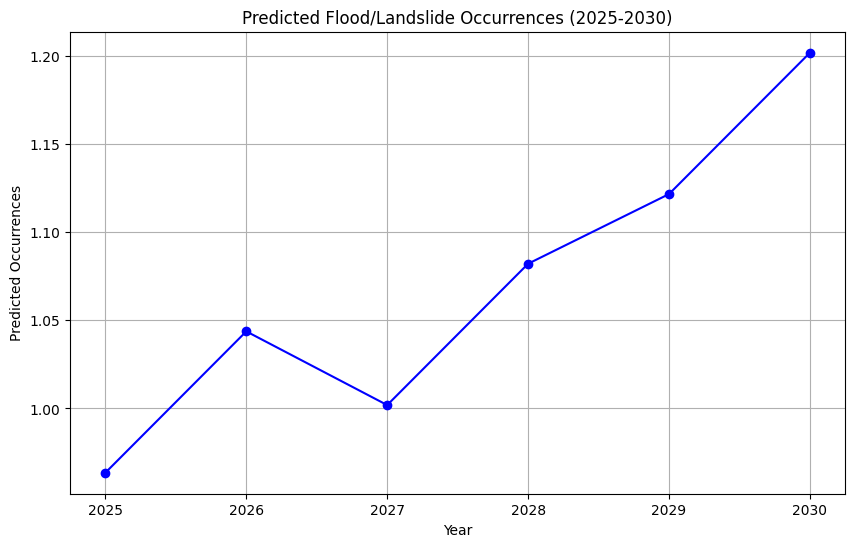

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(future_years_2025_2030['YEAR'], future_years_2025_2030['Predicted_Flood_Occurrences'], marker='o', linestyle='-', color='b')
plt.title('Predicted Flood/Landslide Occurrences (2025-2030)')
plt.xlabel('Year')
plt.ylabel('Predicted Occurrences')
plt.grid(True)
plt.show()


In [ ]:
# Save the predictions to a CSV file
future_years_2025_2030.to_csv('/content/wayanad_flood_landslide_predictions_2025_2030.csv', index=False)


extra work

In [ ]:
# Combine data for 2019-2024 and 2025-2030
future_years_combined = pd.DataFrame({
    'YEAR': [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    'ANNUAL RAINFALL': [2309, 2990, 3610, 2896, 2202, 2700, 2810, 3031, 3131, 3184, 3410, 3900]  # Example values
})


In [ ]:
# Scale the combined data for 2019-2030
future_years_combined_scaled = scaler.transform(future_years_combined[['YEAR', 'ANNUAL RAINFALL']])


In [ ]:
# Predict the flood/landslide occurrences for 2019-2030
future_predictions_combined = model.predict(future_years_combined_scaled)

# Add predictions to the DataFrame
future_years_combined['Predicted_Flood_Occurrences'] = future_predictions_combined

# Display the predictions
print(future_years_combined)


    YEAR  ANNUAL RAINFALL  Predicted_Flood_Occurrences
0   2019             2309                    -0.079870
1   2020             2990                     0.472999
2   2021             3610                     0.976243
3   2022             2896                     0.394241
4   2023             2202                    -0.171490
5   2024             2700                     0.232504
6   2025             2810                     0.320848
7   2026             3031                     0.499495
8   2027             3131                     0.579705
9   2028             3184                     0.621679
10  2029             3410                     0.804393
11  2030             3900                     1.201878


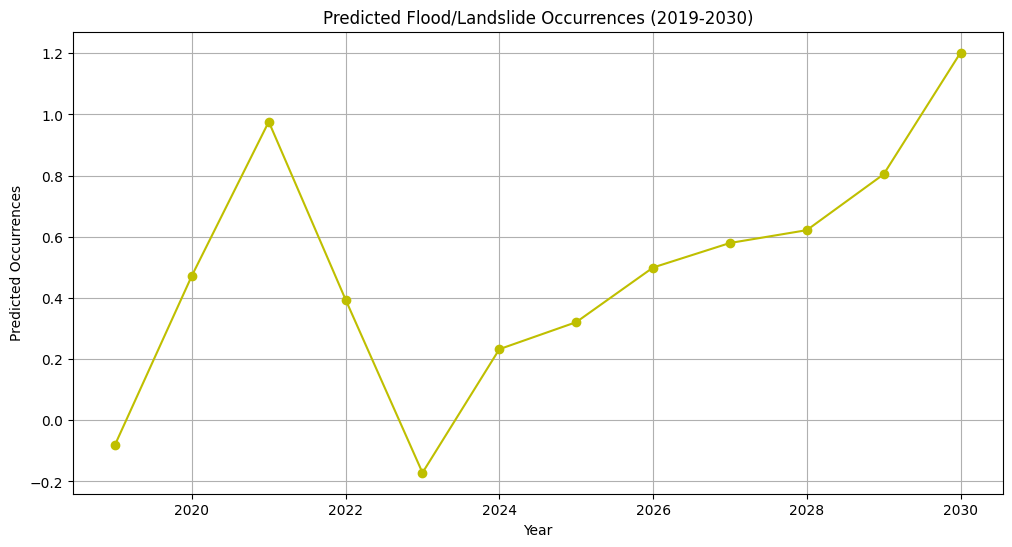

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(future_years_combined['YEAR'], future_years_combined['Predicted_Flood_Occurrences'], marker='o', linestyle='-', color='y')
plt.title('Predicted Flood/Landslide Occurrences (2019-2030)')
plt.xlabel('Year')
plt.ylabel('Predicted Occurrences')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from IPython.display import display

# Data
data = {
    'YEAR': [2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    'ANNUAL_RAINFALL': [2309, 2990, 3610, 2896, 2202, 2700, 2810, 3031, 3131, 3184, 3410, 3900],
    'Predicted_Flood_Occurrences': [-0.079870, 0.472999, 0.976243, 0.394241, -0.171490,
                                     0.232504, 0.320848, 0.499495, 0.579705, 0.621679,
                                     0.804393, 1.201878]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define a function to apply color based on Predicted Flood Occurrences value
def color_flood_occurrences(value):
    if value < 0.5:
        return 'background-color: yellow'
    elif 0.5 <= value <= 0.9:
        return 'background-color: orange'
    elif value > 0.9:
        return 'background-color: red'
    return ''  # No color if it doesn't fit any condition

# Apply the color function to the Predicted_Flood_Occurrences column
styled_df = df.style.applymap(color_flood_occurrences, subset=['Predicted_Flood_Occurrences'])

# Display the styled DataFrame
display(styled_df)


<ipython-input-21-86d4a892c1da>:27: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(color_flood_occurrences, subset=['Predicted_Flood_Occurrences'])


,YEAR,ANNUAL_RAINFALL,Predicted_Flood_Occurrences
0,2019,2309,-0.079870
1,2020,2990,0.472999
2,2021,3610,0.976243
3,2022,2896,0.394241
4,2023,2202,-0.171490
5,2024,2700,0.232504
6,2025,2810,0.320848
7,2026,3031,0.499495
8,2027,3131,0.579705
9,2028,3184,0.621679
